In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path

# Load the datasets
california_crimes_df = Path("Resources/california_department_of_justice_1998_to_2023.csv")
US_inflation_rates_df = Path("Resources/US_Inflation_Rates_1998_to_2023.csv")

california_crimes = pd.read_csv(california_crimes_df)
US_inflation_rates = pd.read_csv(US_inflation_rates_df)

# Debug: Print the first few rows and column names of the dataframes
print("California Crimes DataFrame:")
print(california_crimes.head())
print(california_crimes.columns)
print("\nUS Inflation Rates DataFrame:")
print(US_inflation_rates.head())
print(US_inflation_rates.columns)

California Crimes DataFrame:
   Year Violent Crimes Homicide Rape (Forcible Rape prior to 2014)   Rape  \
0  1998        229,766    2,170                              9,777  7,939   
1  1999        207,874    2,006                              9,443  7,757   
2  2000        210,492    2,074                              9,785  8,197   
3  2001        210,510    2,201                              9,882  8,219   
4  2002        207,988    2,392                             10,176  8,620   

  Attempted Rape Robbery Firearm Knife or Cutting Instrument Other Weapon  \
0          1,838  68,752  23,799                       6,857        6,699   
1          1,686  60,027  19,912                       6,091        5,861   
2          1,588  60,243  20,971                       6,078        5,610   
3          1,663  63,299  22,606                       6,512        6,034   
4          1,556  64,805  23,444                       6,599        5,769   

   ...  Other.1 Over $400 Over $200 $200 thro

In [11]:
# Remove any extra spaces and non-numeric characters from the inflation rate column
US_inflation_rates['Inflation Rate YOY, From Previous Dec.'] = US_inflation_rates['Inflation Rate YOY, From Previous Dec.'].str.replace('%', '').astype(float)

# Keep only necessary columns for inflation data
inflation_data_cleaned = US_inflation_rates[['Year', 'Inflation Rate YOY, From Previous Dec.']].copy()



In [12]:
# Convert Year columns to integer using .loc to avoid SettingWithCopyWarning
california_crimes.loc[:, 'Year'] = california_crimes['Year'].astype(int)
inflation_data_cleaned.loc[:, 'Year'] = inflation_data_cleaned['Year'].astype(int)

# Merge datasets on 'Year'
merged_data = pd.merge(california_crimes, inflation_data_cleaned, on='Year')

# Debug: Print the first few rows and info of the merged data
print("\nMerged DataFrame:")
print(merged_data.head())
print(merged_data.info())



Merged DataFrame:
   Year Violent Crimes Homicide Rape (Forcible Rape prior to 2014)   Rape  \
0  1998        229,766    2,170                              9,777  7,939   
1  1999        207,874    2,006                              9,443  7,757   
2  2000        210,492    2,074                              9,785  8,197   
3  2001        210,510    2,201                              9,882  8,219   
4  2002        207,988    2,392                             10,176  8,620   

  Attempted Rape Robbery Firearm Knife or Cutting Instrument Other Weapon  \
0          1,838  68,752  23,799                       6,857        6,699   
1          1,686  60,027  19,912                       6,091        5,861   
2          1,588  60,243  20,971                       6,078        5,610   
3          1,663  63,299  22,606                       6,512        6,034   
4          1,556  64,805  23,444                       6,599        5,769   

   ... Over $400 Over $200 $200 through $400 $50 throug

In [13]:
# Convert Year columns to integer using .loc to avoid SettingWithCopyWarning
california_crimes.loc[:, 'Year'] = california_crimes['Year'].astype(int)
inflation_data_cleaned.loc[:, 'Year'] = inflation_data_cleaned['Year'].astype(int)

# Merge datasets on 'Year'
merged_data = pd.merge(california_crimes, inflation_data_cleaned, on='Year')


# Debug: Print the first few rows and info of the merged data
print("\nMerged DataFrame:")
print(merged_data.head())
print(merged_data.info())


Merged DataFrame:
   Year Violent Crimes Homicide Rape (Forcible Rape prior to 2014)   Rape  \
0  1998        229,766    2,170                              9,777  7,939   
1  1999        207,874    2,006                              9,443  7,757   
2  2000        210,492    2,074                              9,785  8,197   
3  2001        210,510    2,201                              9,882  8,219   
4  2002        207,988    2,392                             10,176  8,620   

  Attempted Rape Robbery Firearm Knife or Cutting Instrument Other Weapon  \
0          1,838  68,752  23,799                       6,857        6,699   
1          1,686  60,027  19,912                       6,091        5,861   
2          1,588  60,243  20,971                       6,078        5,610   
3          1,663  63,299  22,606                       6,512        6,034   
4          1,556  64,805  23,444                       6,599        5,769   

   ... Over $400 Over $200 $200 through $400 $50 throug

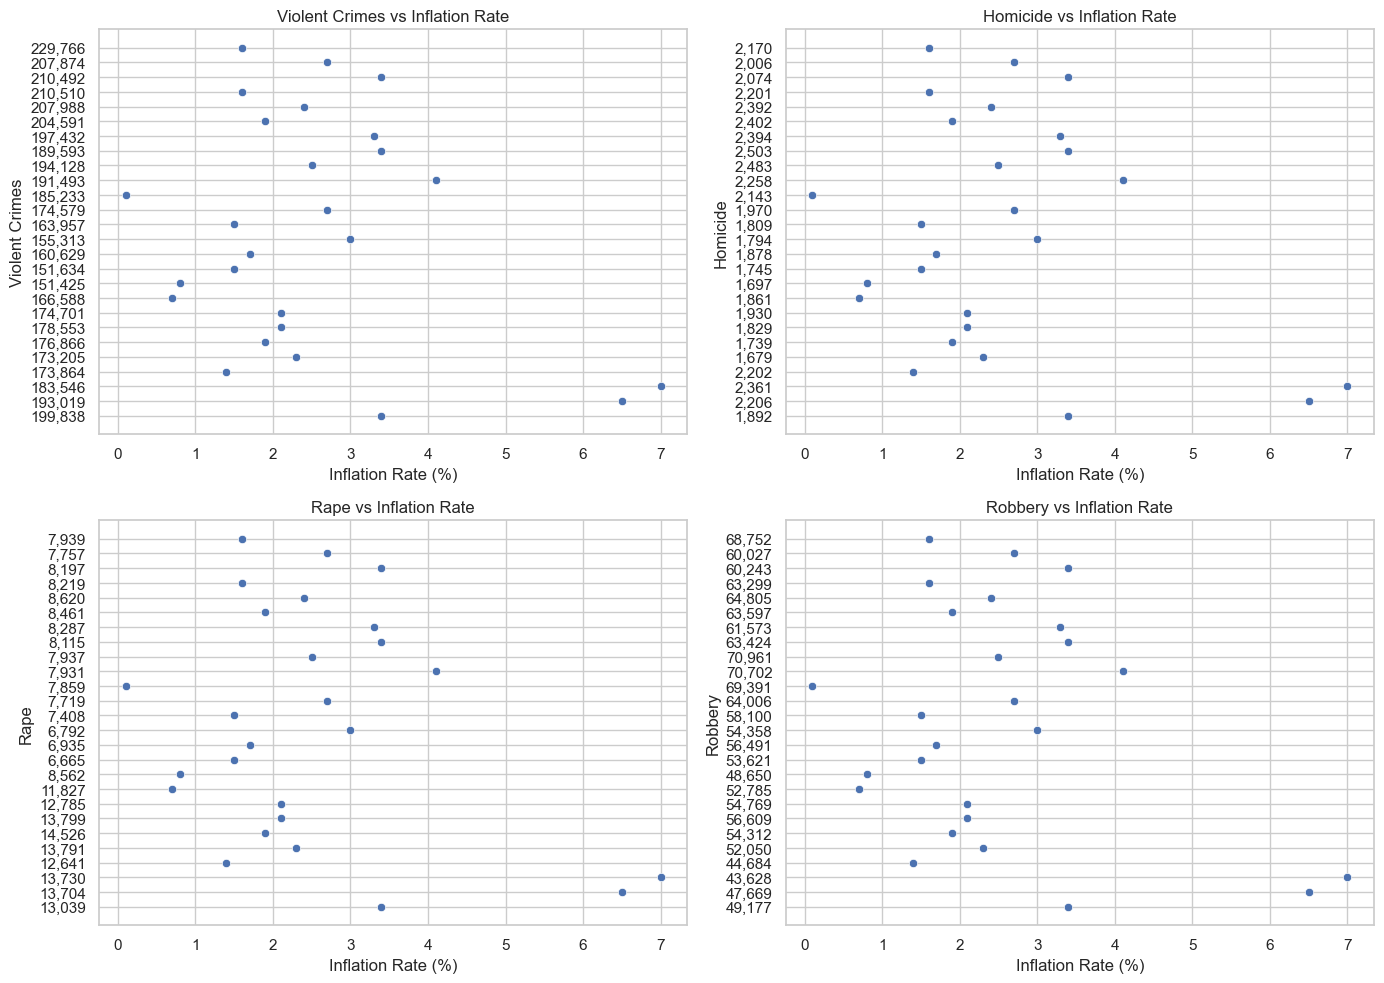

In [16]:
# Set plot style
sns.set(style="whitegrid")

# Create subplots for each crime type vs inflation rate
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot Violent Crimes vs Inflation Rate
sns.scatterplot(ax=axes[0, 0], x='Inflation Rate YOY, From Previous Dec.', y='Violent Crimes', data=merged_data)
axes[0, 0].set_title('Violent Crimes vs Inflation Rate')
axes[0, 0].set_xlabel('Inflation Rate (%)')
axes[0, 0].set_ylabel('Violent Crimes')

# Plot Homicide vs Inflation Rate
sns.scatterplot(ax=axes[0, 1], x='Inflation Rate YOY, From Previous Dec.', y='Homicide', data=merged_data)
axes[0, 1].set_title('Homicide vs Inflation Rate')
axes[0, 1].set_xlabel('Inflation Rate (%)')
axes[0, 1].set_ylabel('Homicide')

# Plot Rape vs Inflation Rate
sns.scatterplot(ax=axes[1, 0], x='Inflation Rate YOY, From Previous Dec.', y='Rape', data=merged_data)
axes[1, 0].set_title('Rape vs Inflation Rate')
axes[1, 0].set_xlabel('Inflation Rate (%)')
axes[1, 0].set_ylabel('Rape')

# Plot Robbery vs Inflation Rate
sns.scatterplot(ax=axes[1, 1], x='Inflation Rate YOY, From Previous Dec.', y='Robbery', data=merged_data)
axes[1, 1].set_title('Robbery vs Inflation Rate')
axes[1, 1].set_xlabel('Inflation Rate (%)')
axes[1, 1].set_ylabel('Robbery')

plt.tight_layout()
plt.show()


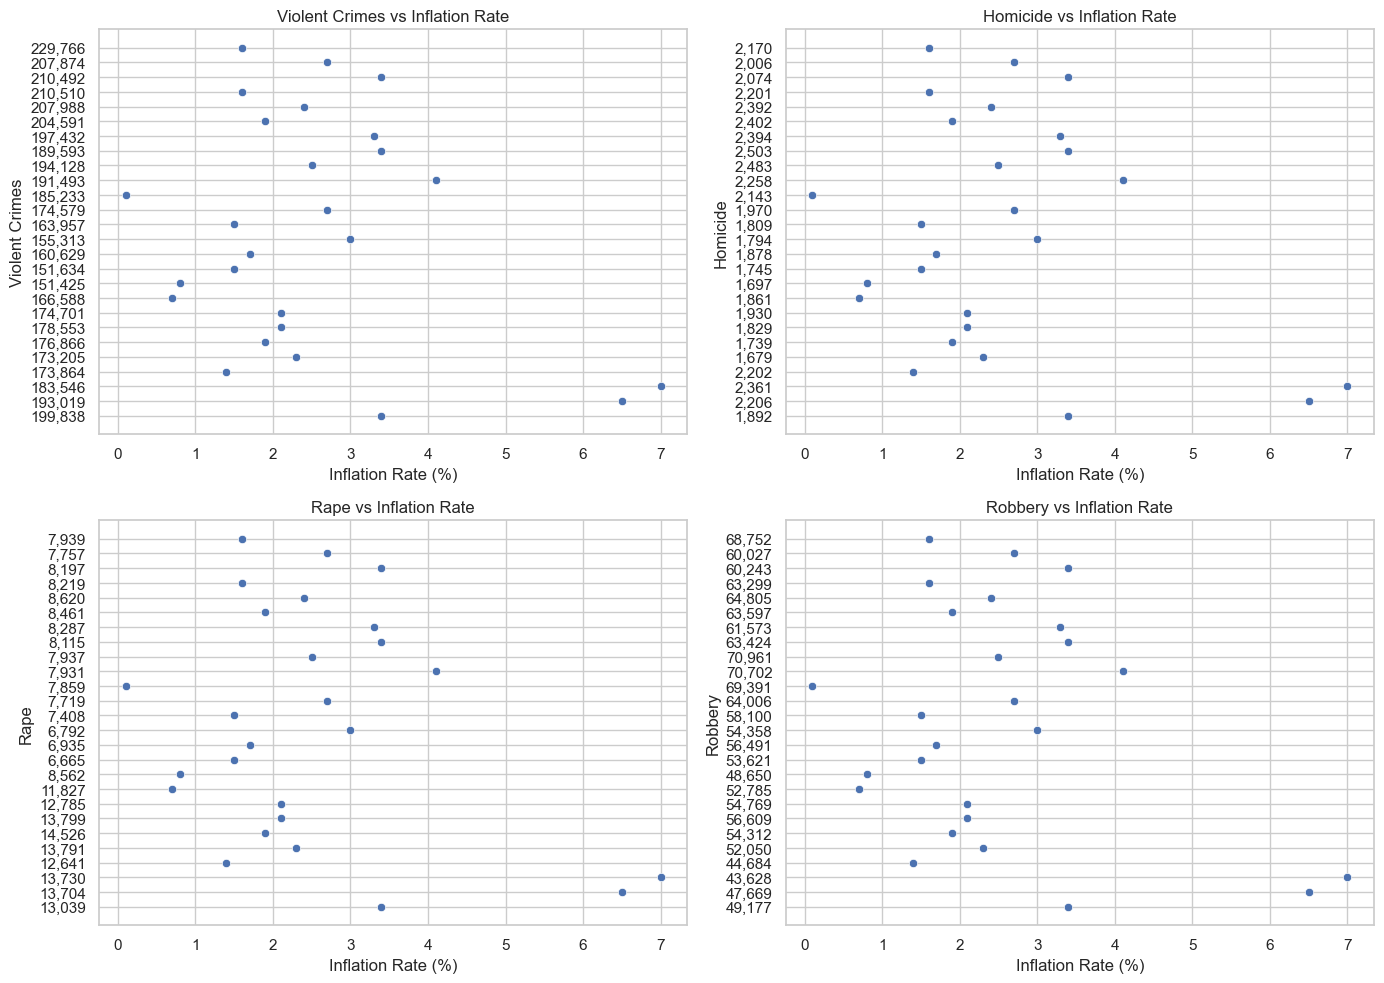

In [20]:
# Set plot style
sns.set(style="whitegrid")

# Create subplots for each crime type vs inflation rate
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot Violent Crimes vs Inflation Rate
sns.scatterplot(ax=axes[0, 0], x='Inflation Rate YOY, From Previous Dec.', y='Violent Crimes', data=merged_data)
axes[0, 0].set_title('Violent Crimes vs Inflation Rate')
axes[0, 0].set_xlabel('Inflation Rate (%)')
axes[0, 0].set_ylabel('Violent Crimes')
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(integer=True))  # Set integer ticks

# Plot Homicide vs Inflation Rate
sns.scatterplot(ax=axes[0, 1], x='Inflation Rate YOY, From Previous Dec.', y='Homicide', data=merged_data)
axes[0, 1].set_title('Homicide vs Inflation Rate')
axes[0, 1].set_xlabel('Inflation Rate (%)')
axes[0, 1].set_ylabel('Homicide')
axes[0, 1].xaxis.set_major_locator(plt.MaxNLocator(integer=True))  # Set integer ticks

# Plot Rape vs Inflation Rate
sns.scatterplot(ax=axes[1, 0], x='Inflation Rate YOY, From Previous Dec.', y='Rape', data=merged_data)
axes[1, 0].set_title('Rape vs Inflation Rate')
axes[1, 0].set_xlabel('Inflation Rate (%)')
axes[1, 0].set_ylabel('Rape')
axes[1, 0].xaxis.set_major_locator(plt.MaxNLocator(integer=True))  # Set integer ticks

# Plot Robbery vs Inflation Rate
sns.scatterplot(ax=axes[1, 1], x='Inflation Rate YOY, From Previous Dec.', y='Robbery', data=merged_data)
axes[1, 1].set_title('Robbery vs Inflation Rate')
axes[1, 1].set_xlabel('Inflation Rate (%)')
axes[1, 1].set_ylabel('Robbery')
axes[1, 1].xaxis.set_major_locator(plt.MaxNLocator(integer=True))  # Set integer ticks

plt.tight_layout()
plt.show()